In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.preprocessing import StandardScaler,StandardScaler,MinMaxScaler, LabelEncoder
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mhealth/stroke-healthcare.csv") 

In [8]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.shape

(5110, 12)

In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [13]:
df = df.drop(columns = ['id'])

In [14]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:

from sklearn.impute import SimpleImputer
import numpy as np
missing_value_imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X=df.iloc[:,8].values 
X=X.reshape(-1,1) 
df.iloc[:,8]=missing_value_imputer.fit_transform(X)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Text(0.5, 1.0, 'Stroke')

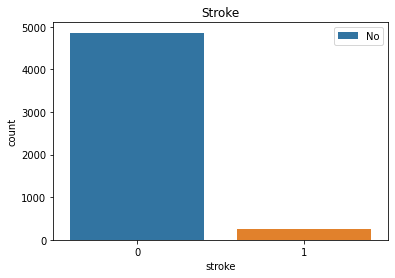

In [16]:
sns.countplot(x="stroke", data=df)
plt.legend(["No","Yes"])
plt.title("Stroke")

In [17]:
y = df['stroke']
print(f'Percentage of stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for stroke)\nPercentage of NOT stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT stroke)')

Percentage of stroke: % 4.87 --> (249 cases for stroke)
Percentage of NOT stroke: % 95.13 --> (4861 cases for NOT stroke)


In [18]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


Categorical Columns: Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [19]:
df[numerical].head().T

,0,1,2,3,4
age,67.00,61.000000,80.00,49.00,79.00
hypertension,0.00,0.000000,0.00,0.00,1.00
heart_disease,1.00,0.000000,1.00,0.00,0.00
avg_glucose_level,228.69,202.210000,105.92,171.23,174.12
bmi,36.60,28.893237,32.50,34.40,24.00


In [20]:
df[numerical].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,5110.000000,43.226614,22.612647,0.080000,25.000000,45.000000,61.000000,82.000000
hypertension,5110.000000,0.097456,0.296607,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,5110.000000,0.054012,0.226063,0.000000,0.000000,0.000000,0.000000,1.000000
avg_glucose_level,5110.000000,106.147677,45.283560,55.120000,77.245000,91.885000,114.090000,271.740000
bmi,5110.000000,28.893237,7.698018,10.300000,23.800000,28.400000,32.800000,97.600000


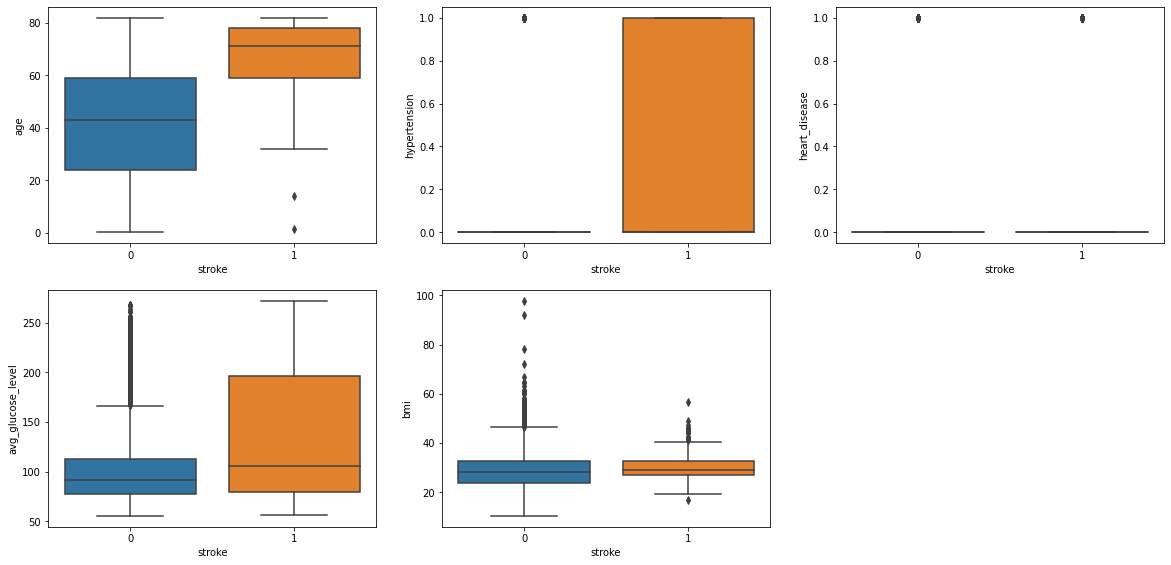

In [21]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "stroke":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='stroke', y=feature, data=df)

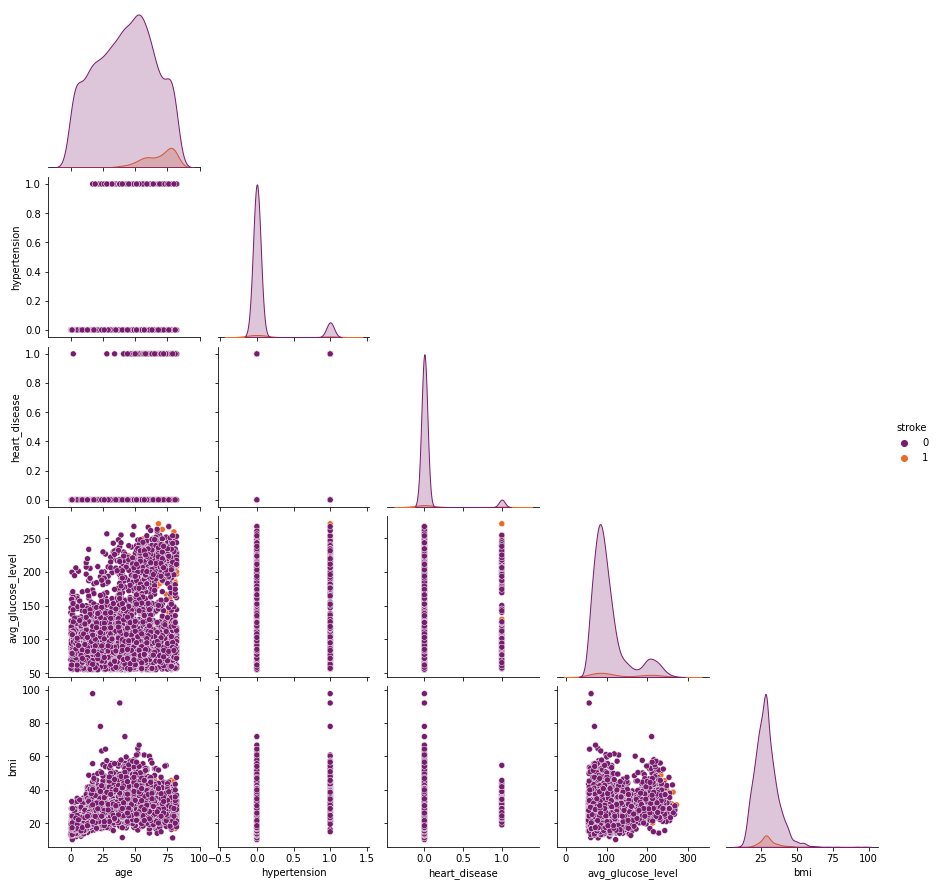

In [22]:
sns.pairplot(df, hue="stroke", palette="inferno", corner=True);

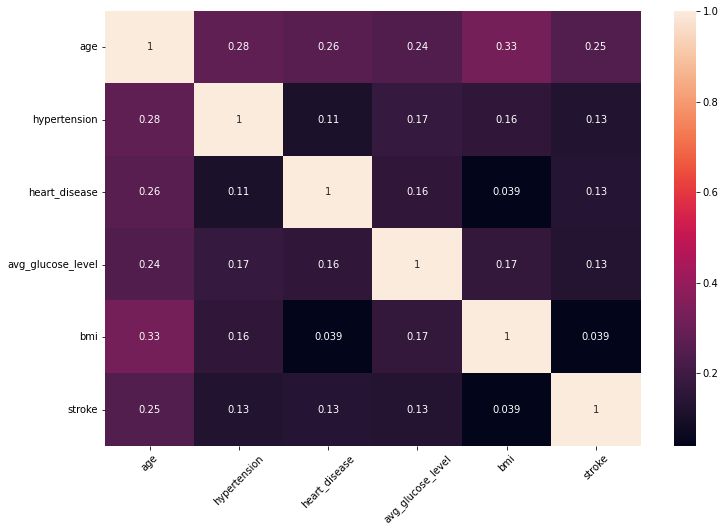

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

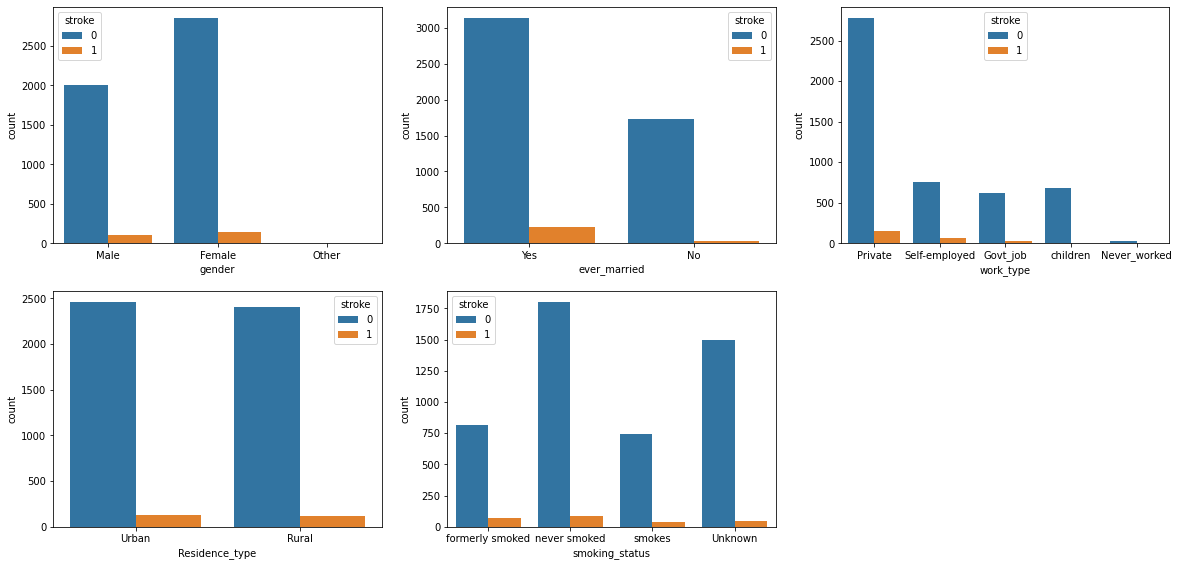

In [24]:
index = 0
plt.figure(figsize=(20,20))
for feature in categorical:
    if feature != "stroke":
        index += 1
        plt.subplot(4, 3, index)
        sns.countplot(data = df, x =feature, hue = "stroke")

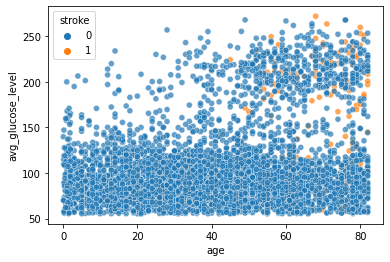

In [25]:
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', alpha=0.7)

In [26]:
from sklearn.preprocessing import LabelEncoder  
labelencoder = LabelEncoder()
X= df['gender'].values
df['gender'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [27]:
labelencoder = LabelEncoder()
X= df['ever_married'].values
df['ever_married'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)


In [28]:
labelencodere = LabelEncoder()
X= df['Residence_type'].values
df['Residence_type'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)


In [29]:
labelencodere = LabelEncoder()
X= df['smoking_status'].values
df['smoking_status'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [30]:
labelencodere = LabelEncoder()
X= df['work_type'].values
df['work_type'] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

In [31]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [32]:
X = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(X, y)

y_sm.value_counts()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_sm,y_sm, test_size=0.2, stratify = y_sm, random_state = 101)

In [34]:
scaler = MinMaxScaler()
scaler
MinMaxScaler()

MinMaxScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train Data score: 0.8060948952038061
Test Data score:  0.8102827763496144
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       972
           1       0.79      0.84      0.82       973

    accuracy                           0.81      1945
   macro avg       0.81      0.81      0.81      1945
weighted avg       0.81      0.81      0.81      1945



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


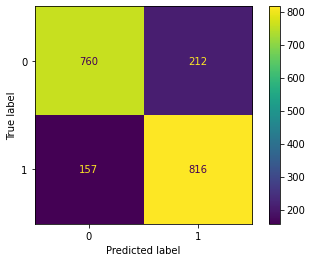

In [36]:
    # Logistic Regression
    log = LogisticRegression(random_state=101, class_weight= None, solver='liblinear')
    log.fit(X_train, y_train)
    print('Train Data score:',log.score(X_train,y_train))
    print('Test Data score: ',log.score(X_test,y_test))
    print (classification_report(y_test,log.predict(X_test)))
    plot_confusion_matrix(log,X_test, y_test)  

    

Train Data score: 1.0
Test Data score:  0.9084832904884319
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       972
           1       0.89      0.93      0.91       973

    accuracy                           0.91      1945
   macro avg       0.91      0.91      0.91      1945
weighted avg       0.91      0.91      0.91      1945



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


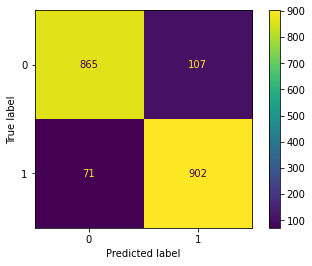

In [37]:
    # Decision Tree
    decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=101, class_weight=None)
    decision_tree.fit(X_train, y_train)
    print('Train Data score:',decision_tree.score(X_train,y_train))
    print('Test Data score: ',decision_tree.score(X_test,y_test))
    print (classification_report(y_test,decision_tree.predict(X_test)))
    plot_confusion_matrix(decision_tree,X_test, y_test)

Train Data score: 0.9974283142599975
Test Data score:  0.9316195372750643
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       972
           1       0.93      0.94      0.93       973

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


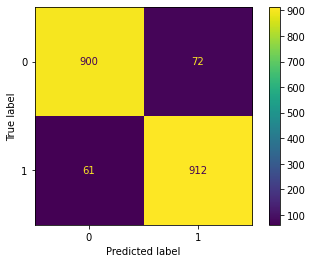

In [38]:
    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=101, class_weight=None)
    random_forest.fit(X_train, y_train)
    print('Train Data score:',random_forest.score(X_train,y_train))
    print('Test Data score: ',random_forest.score(X_test,y_test))
    print (classification_report(y_test,random_forest.predict(X_test)))
    plot_confusion_matrix(random_forest,X_test, y_test)
    

Train Data score: 0.9409798122669409
Test Data score:  0.8987146529562982
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.85      0.98      0.91       973

    accuracy                           0.90      1945
   macro avg       0.91      0.90      0.90      1945
weighted avg       0.91      0.90      0.90      1945



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


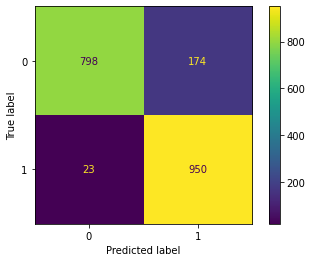

In [39]:
    # KNN
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train, y_train) 
    print('Train Data score:',knn.score(X_train,y_train))
    print('Test Data score: ',knn.score(X_test,y_test))
    print (classification_report(y_test,knn.predict(X_test)))
    plot_confusion_matrix(knn,X_test, y_test)

Train Data score: 0.7677767776777678
Test Data score:  0.7598971722365039
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       972
           1       0.73      0.82      0.77       973

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


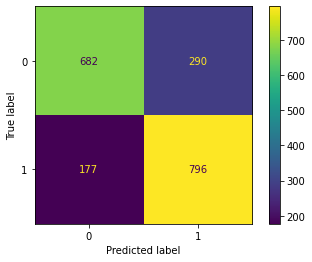

In [40]:
    # SVC
    svc = SVC(random_state=101, class_weight=None)
    svc.fit(X_train, y_train) 
    print('Train Data score:',svc.score(X_train,y_train))
    print('Test Data score: ',svc.score(X_test,y_test))
    print (classification_report(y_test,svc.predict(X_test)))
    plot_confusion_matrix(svc,X_test, y_test)

In [41]:
def models_accuracy():    
    Scores = pd.DataFrame(columns = ["LR_Acc", "SVC_Acc", "DT_Acc", "RF_Acc", "KNN_Acc"])
    
    train= [log.score(X_train,y_train), svc.score(X_train,y_train), decision_tree.score(X_train,y_train), random_forest.score(X_train,y_train), knn.score(X_train,y_train)]
    Scores.loc[0] = train

      
    test = [log.score(X_test,y_test), svc.score(X_test,y_test), decision_tree.score(X_test,y_test), random_forest.score(X_test,y_test), knn.score(X_test,y_test)]
    Scores.loc[1] = test
    Scores.set_axis(['train', 'test'] ,axis='index', inplace=True)
    #Scores.style.background_gradient(cmap='RdPu')

    return Scores.style.applymap(lambda x: "background-color: pink" if x<0.6 or x == 1 else "background-color: lightgreen")\
                       .applymap(lambda x: 'opacity: 40%;' if (x < 0.8) else None)\
                       .applymap(lambda x: 'color: red' if x == 1 or x <=0.8 else 'color: darkblue')    
    

In [42]:
models_accuracy()

,LR_Acc,SVC_Acc,DT_Acc,RF_Acc,KNN_Acc
train,0.806095,0.767777,1.000000,0.997428,0.940980
test,0.810283,0.759897,0.908483,0.931620,0.898715
